<a href="https://colab.research.google.com/github/sowlamineatifmsde/lamine/blob/main/Neuralprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 31.2 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
spacy 3.4.3 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
confection 0.0.3 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incomp

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
import pickle
%matplotlib inline

In [5]:
from google.colab import files
upload = files.upload()

Saving df.csv to df.csv


In [6]:
import io

In [24]:
df[df['SOLDE']<=-30000000]

,Date,annee,ENC,DEC,SOLDE,CA,RN,masse,solscale
4019,01/01/2021,2 021.00,4.068526e+08,4.214298e+08,-32854662.60,211452735.5,4669659.58,146552507.0,-0.1554
4020,02/01/2021,2 021.00,0.000000e+00,0.000000e+00,-32854662.60,211452735.5,4669659.58,146552507.0,-0.1554
4021,03/01/2021,2 021.00,0.000000e+00,0.000000e+00,-32854662.60,211452735.5,4669659.58,146552507.0,-0.1554
4108,31/03/2021,2 021.00,1.757490e+06,2.018417e+07,-38539688.71,211452735.5,4669659.58,146552507.0,-0.1823
4199,30/06/2021,2 021.00,6.334399e+05,1.953248e+07,-40560106.64,211452735.5,4669659.58,146552507.0,-0.1918
...,...,...,...,...,...,...,...,...,...
4359,07/12/2021,2 021.00,1.439682e+06,8.460738e+05,-32311460.95,211452735.5,4669659.58,146552507.0,-0.1528
4360,08/12/2021,2 021.00,8.163543e+05,8.633186e+05,-32358425.22,211452735.5,4669659.58,146552507.0,-0.1530
4361,09/12/2021,2 021.00,1.789272e+06,3.764730e+05,-30945626.03,211452735.5,4669659.58,146552507.0,-0.1463
4367,15/12/2021,2 021.00,9.925527e+05,5.047134e+06,-30840722.47,211452735.5,4669659.58,146552507.0,-0.1459


In [54]:
annee=int(input('quelle annee'))

quelle annee2013


In [61]:
df = pd.read_csv(io.BytesIO(upload['df.csv']),delimiter=";")
df['SOLDEM']=df['ENC']-df['DEC']
df.drop('SOLDE',axis=1,inplace=True)
df['SOLDE']=np.cumsum(df['SOLDEM'])
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Annee']=df['Date'].apply(lambda x: x.year)
df=df[df['Annee']>=annee]
df.drop('SOLDEM',axis=1,inplace=True)
df.drop('ENC',axis=1,inplace=True)
df.drop('solscale',axis=1,inplace=True)
df.drop('annee',axis=1,inplace=True)
df.drop('masse',axis=1,inplace=True)
df.drop('RN',axis=1,inplace=True)
df.drop('CA',axis=1,inplace=True)
df.drop('DEC',axis=1,inplace=True)
df.drop('Annee',axis=1,inplace=True)
df.set_index('Date',drop=True,inplace=True)
df= df.reset_index().rename(columns={'Date':'ds', 'SOLDE':'y'})
df.head()

,ds,y
0,2013-01-01,-505193.41
1,2013-01-02,348904.57
2,2013-01-03,830051.03
3,2013-01-04,-1127776.23
4,2013-01-05,-1127776.23


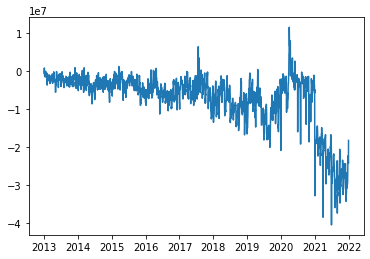

In [59]:
plt.plot(df)

In [63]:
m=NeuralProphet()
m.fit(df,freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.97% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 137
INFO:NP.config:Auto-set epochs to 137


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.19E-02, min: 1.29E-01
INFO:NP.utils_torch:lr-range-test results: steep: 5.19E-02, min: 1.29E-01


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.19E-02, min: 1.11E-01
INFO:NP.utils_torch:lr-range-test results: steep: 5.19E-02, min: 1.11E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.46E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 6.46E-02
Epoch[137/137]: 100%|██████████| 137/137 [00:45<00:00,  3.02it/s, SmoothL1Loss=0.00643, MAE=3.11e+6, RMSE=4.43e+6, Loss=0.00591, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.615632,4.052706e+07,4.930188e+07,0.458946,0.0
1,0.481143,3.447224e+07,4.217622e+07,0.354894,0.0
2,0.322988,2.696065e+07,3.312617e+07,0.233796,0.0
3,0.162982,1.854323e+07,2.258635e+07,0.114969,0.0
4,0.068208,1.229645e+07,1.451298e+07,0.047740,0.0
...,...,...,...,...,...
132,0.006469,3.121095e+06,4.434551e+06,0.005946,0.0
133,0.006451,3.111734e+06,4.430564e+06,0.005932,0.0
134,0.006441,3.111177e+06,4.448066e+06,0.005923,0.0
135,0.006432,3.107411e+06,4.445255e+06,0.005916,0.0


In [68]:
future = m.make_future_dataframe(df, periods=1200)
forecast=m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.97% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is e

,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
0,2022-01-01,None,NaN,-25734034.0,-25430620.0,-343829.65625,40415.730469
1,2022-01-02,None,NaN,-25759224.0,-25456240.0,-331750.75000,28766.470703
2,2022-01-03,None,NaN,-25747244.0,-25481862.0,-314550.50000,49167.625000
3,2022-01-04,None,NaN,-25862986.0,-25507484.0,-292197.28125,-63304.375000
4,2022-01-05,None,NaN,-26001032.0,-25533114.0,-264713.53125,-203203.140625


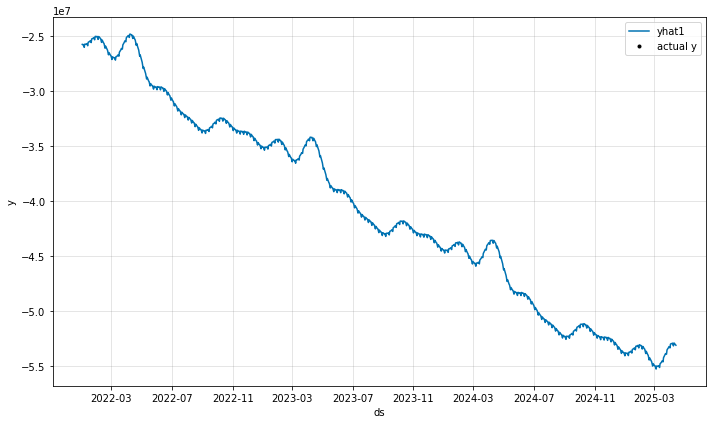

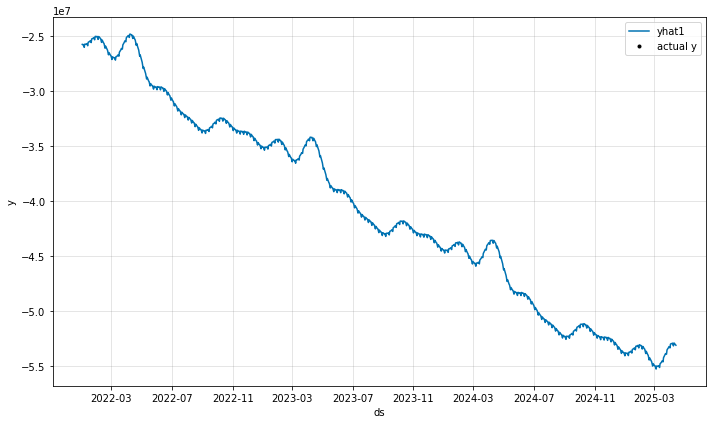

In [69]:
m.plot(forecast)

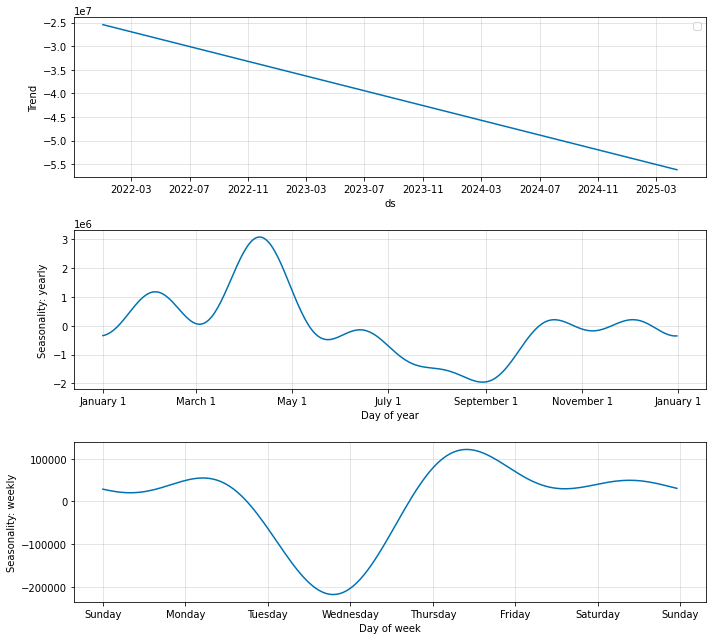

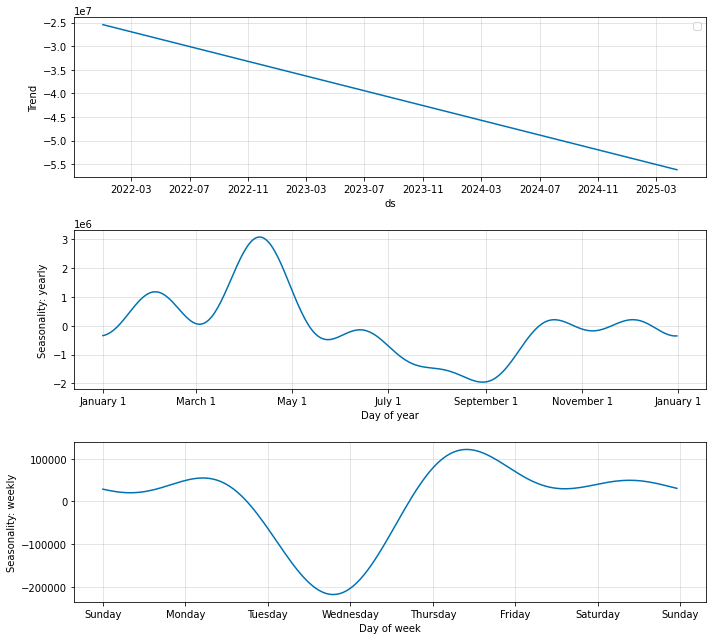

In [70]:
m.plot_components(forecast)

In [71]:
with open('Forecast_model.pkl',"wb") as f:
  pickle.dump(m,f)

In [72]:
del m

In [74]:
with open('Forecast_model.pkl',"rb") as f:
  m=pickle.load(f)

In [75]:
m